In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#import data
df = pd.read_csv("C:/Users/Max/Documents/Python/Data/titanic.csv")

#explore
display(df.head())
df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [2]:
#describe
display(df.describe())
df.describe(include=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barkworth, Mr. Algernon Henry Wilson",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [3]:
#Some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Check to see the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#We now want to find out the relationship between the feature data and the survival rate
survived = df[df["Survived"] == 1]
died = df[df["Survived"] == 0]

print("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df)*100.0))
print("Died: %i (%.1f%%)"% (len(died), float(len(died))/len(df) * 100.0))
print("Total: %i"%len(df))

Survived: 342 (38.4%)
Died: 549 (61.6%)
Total: 891


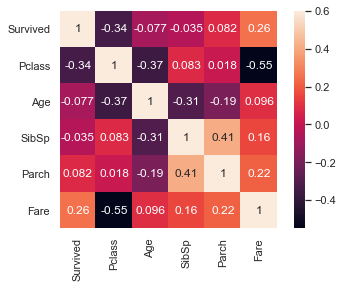

In [6]:
#Let's check if there are any correlations

plt.figsize=(15,6)
sns.heatmap(df.drop("PassengerId", axis=1).corr(), vmax=0.6, square=True, annot=True)

In [7]:
# Pclass and survival
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
pclass_s = df.groupby("Pclass").Survived.value_counts()
pclass_s

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

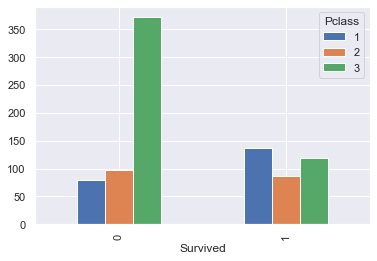

In [9]:
#Plot a graph
pclass_s.unstack(level=0).plot(kind="bar", subplots = False)

In [9]:
#looks like richer people more likely to be saved
pclass_s_avg = df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean()
pclass_s_avg

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


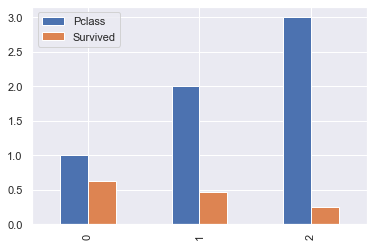

In [10]:
pclass_s_avg.plot(kind="bar", subplots = False)

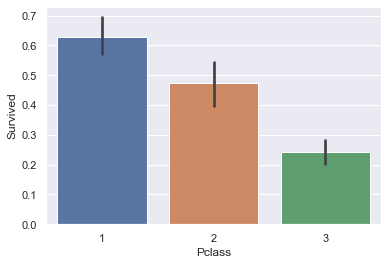

In [11]:
#Using Seaborn!
sns.barplot(x="Pclass", y="Survived", data=df)

In [12]:
#Pclass is an important feature, more likely to be saved if in class 1 compared to class 2 & 3.
#what about sex? Has to be important
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
#more men than women, but what about survived?
sex_s = df.groupby("Sex").Survived.value_counts()
sex_s

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
#yup, mostly men died, what proportion?
sex_s_avg = df[["Sex", "Survived"]].groupby("Sex", as_index = False).mean()
sex_s_avg

,Sex,Survived
0,female,0.742038
1,male,0.188908


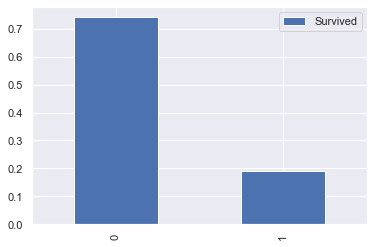

In [16]:
sex_s_avg.plot(kind= "bar", subplots=False)

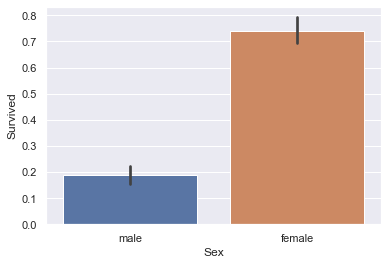

In [17]:
#Using Seaborn
sns.barplot(x="Sex",y="Survived", data=df)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0, 0.5, 'Percentage')

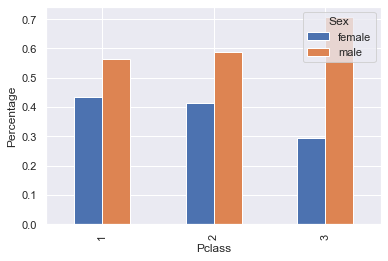

In [18]:
#So sex is an important feature as women were more likely to survive.
#Maybe 3rd class had less women, resulting in a higher proportion in both sex and pclass

cts = pd.crosstab(df["Pclass"], df["Sex"])
display(cts)

cts.div(cts.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

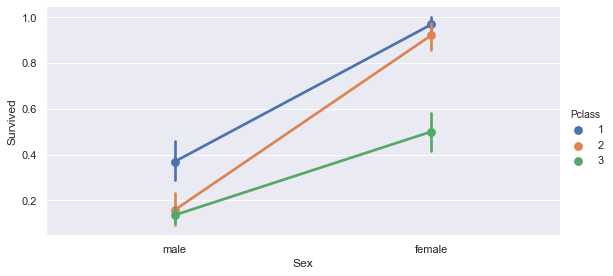

In [19]:
sns.catplot('Sex', 'Survived', hue='Pclass', kind="point", height=4, aspect=2, data=df)

In [20]:
#So being a 1st or 2nd class woman mean's you got a 90% chance or more of survival, 3rd class male will get you 10%.
#What about where they embarked from?
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.groupby("Embarked").Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [22]:
df[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


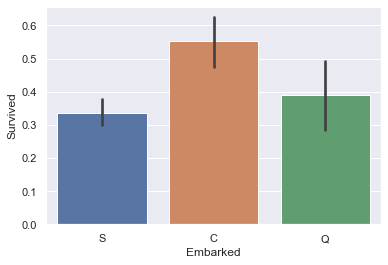

In [23]:
sns.barplot(x="Embarked", y="Survived", data=df)

In [24]:
#looks like emabrking at C means you were more likely to survive.
#What about Parch?
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
df.groupby("Parch").Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [26]:
df[["Parch","Survived"]].groupby("Parch", as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


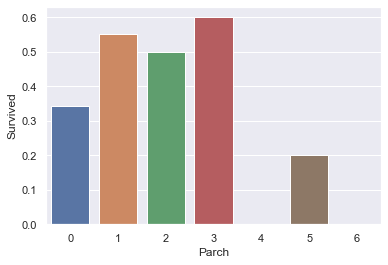

In [27]:
sns.barplot(x='Parch', y='Survived', ci=None, data=df)

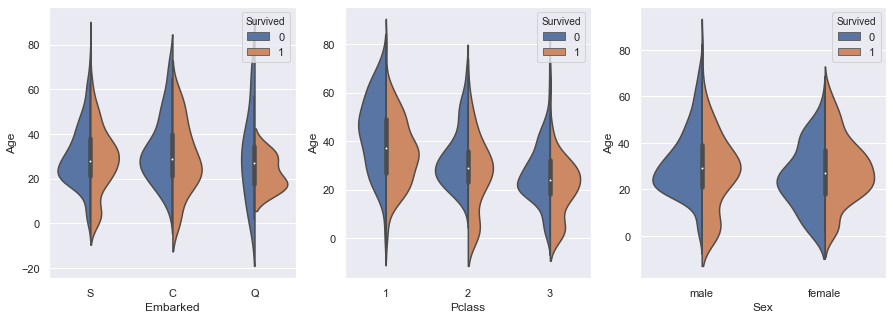

In [28]:
#Lets try age

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)

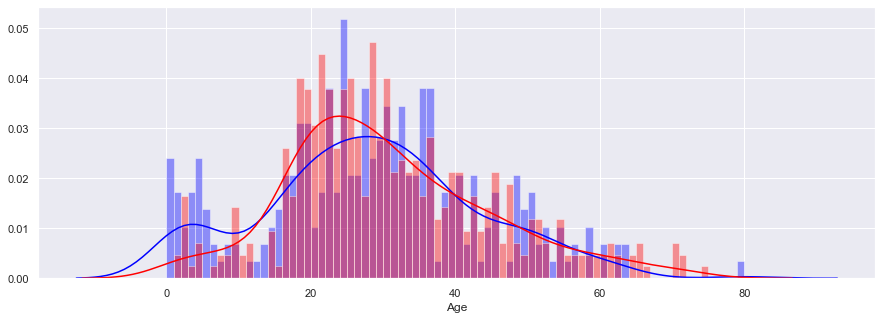

In [29]:
total_survived = df[df['Survived']==1]
total_not_survived = df[df['Survived']==0]

male_survived = df[(df['Survived']==1) & (df['Sex']=="male")]
female_survived = df[(df['Survived']==1) & (df['Sex']=="female")]

male_not_survived = df[(df['Survived']==0) & (df['Sex']=="male")]
female_not_survived = df[(df['Survived']==0) & (df['Sex']=="female")]

#plot a distribution

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age')

In [30]:
#Lets take a look at Fare

df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
df.Fare.isnull().sum()

0

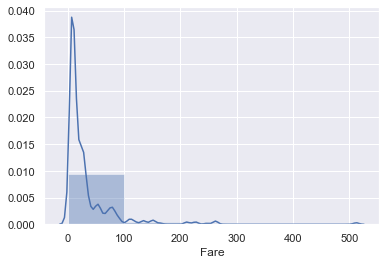

In [37]:
sns.distplot(df['Fare'], bins=range(0,513,100), kde=True)

In [ ]:
#Largest fare was 512 but very few instances of this high a price.